Corinne Orton 7-21<br><br>
A file to create embeddings using any transform in transforms.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from transforms import *
from transforms import get_embedding


### Load data ###

#### CAFs ####

In [2]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
expr = pd.read_csv(path + 'data/CAFs.txt', sep='\t')
print(expr.iloc[0:4,0:4])
X_train = expr.values[:,0:(expr.shape[1]-1)]
X_train = np.log(X_train + 1)
n = X_train.shape[0]
print("\nThis data set contains " + str(n) + " samples")
y_train = expr.values[:,expr.shape[1]-1]
print("\nDimensions of the  data set: ")
print(X_train.shape, y_train.shape)

                1110020A21Rik  1110046J04Rik  1190002F15Rik  1500015A07Rik
SS2_15_0048_A3            0.0            0.0            0.0            0.0
SS2_15_0048_A6            0.0            0.0            0.0            0.0
SS2_15_0048_A5            0.0            0.0            0.0            0.0
SS2_15_0048_A4            0.0            0.0            0.0            0.0

This data set contains 716 samples

Dimensions of the  data set: 
(716, 557) (716,)


#### Cell Mix ####

##### no loc avg #####

In [26]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_CellMix.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

##### Loc Avg #####

In [35]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_CellMix_WithLocAvg.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

#### Duo 4eq, 8eq ####
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.<br>


In [48]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "8eq_log_pca.npy") # just change 4 to 8, vice versa to load other set
y_train = np.load("data/"+ "8eq_labels.npy")

#### FMNIST ####

In [10]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
source_df = pd.read_csv("data/" + "fashion-mnist.csv")
X_train = source_df.iloc[:,:].values.astype(np.float32)
y_train = source_df["class"].values 

#### Kang #### 
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.<br>


In [3]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "kang_log_pca.npy")
y_train = np.load("data/"+ "kang_labels.npy")

#### Kazer #### 
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.<br>
Labels converted to integer on 7-22-25.

In [33]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load(path + "data/"+ "hiv_70.npy")
y_train = np.load(path + "data/"+ "hiv_label.npy", allow_pickle=True)

#### MNIST ####
Accessed and saved 7-23-25 using sklearn.datasets fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
from sklearn import datasets
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
X_train = mnist.data
y_train = mnist.target.astype(int)

#### Muraro #### 
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.


In [59]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "muraro_log_pca.npy")
y_train = np.load("data/"+ "muraro_labels.npy")

#### Stuart ####
Downloaded from https://github.com/hyhuang00/scRNA-DR2020/tree/main/data on 7-21-25.

In [67]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
X_train = np.load("data/"+ "seurat_bmnc_rna_70.npy")
y_train = np.load("data/"+ "stuart_labels.npy")

#### TM Lung, Pancreas ####

##### no loc avg #####

In [58]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_TMPanc.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

##### loc avg #####

In [65]:
path = '/Users/corinne/Documents/GitHub/drpaper25/'
df = pd.read_csv(path + 'data/pcadata_TMPanc_WithLocAvg.csv')
X_train = df.values[:,0:(df.shape[1]-1)]
y_train = df.values[:,df.shape[1]-1]

#### Convert text labels to ints ####

In [4]:
# code to save labels
labels = []
for i in range(len(y_train)):
    current = y_train[i]
    if current not in labels:
        print(current)
        labels.append(current)


B cell
T cell
plasmablast
NK cell
DCs
monocyte
CTLs


In [6]:
# create map
map = {}
for i in range(len(labels)):
    map[labels[i]] = i
print(map)

{'B cell': 0, 'T cell': 1, 'plasmablast': 2, 'NK cell': 3, 'DCs': 4, 'monocyte': 5, 'CTLs': 6}


In [8]:
y_train = [map[val] for val in y_train]

In [9]:
np.save(path+"data/"+ "hiv_label.npy",y_train)

### Embed ###

In [29]:
y = get_embedding(X_train, "pca")

### Plot ###

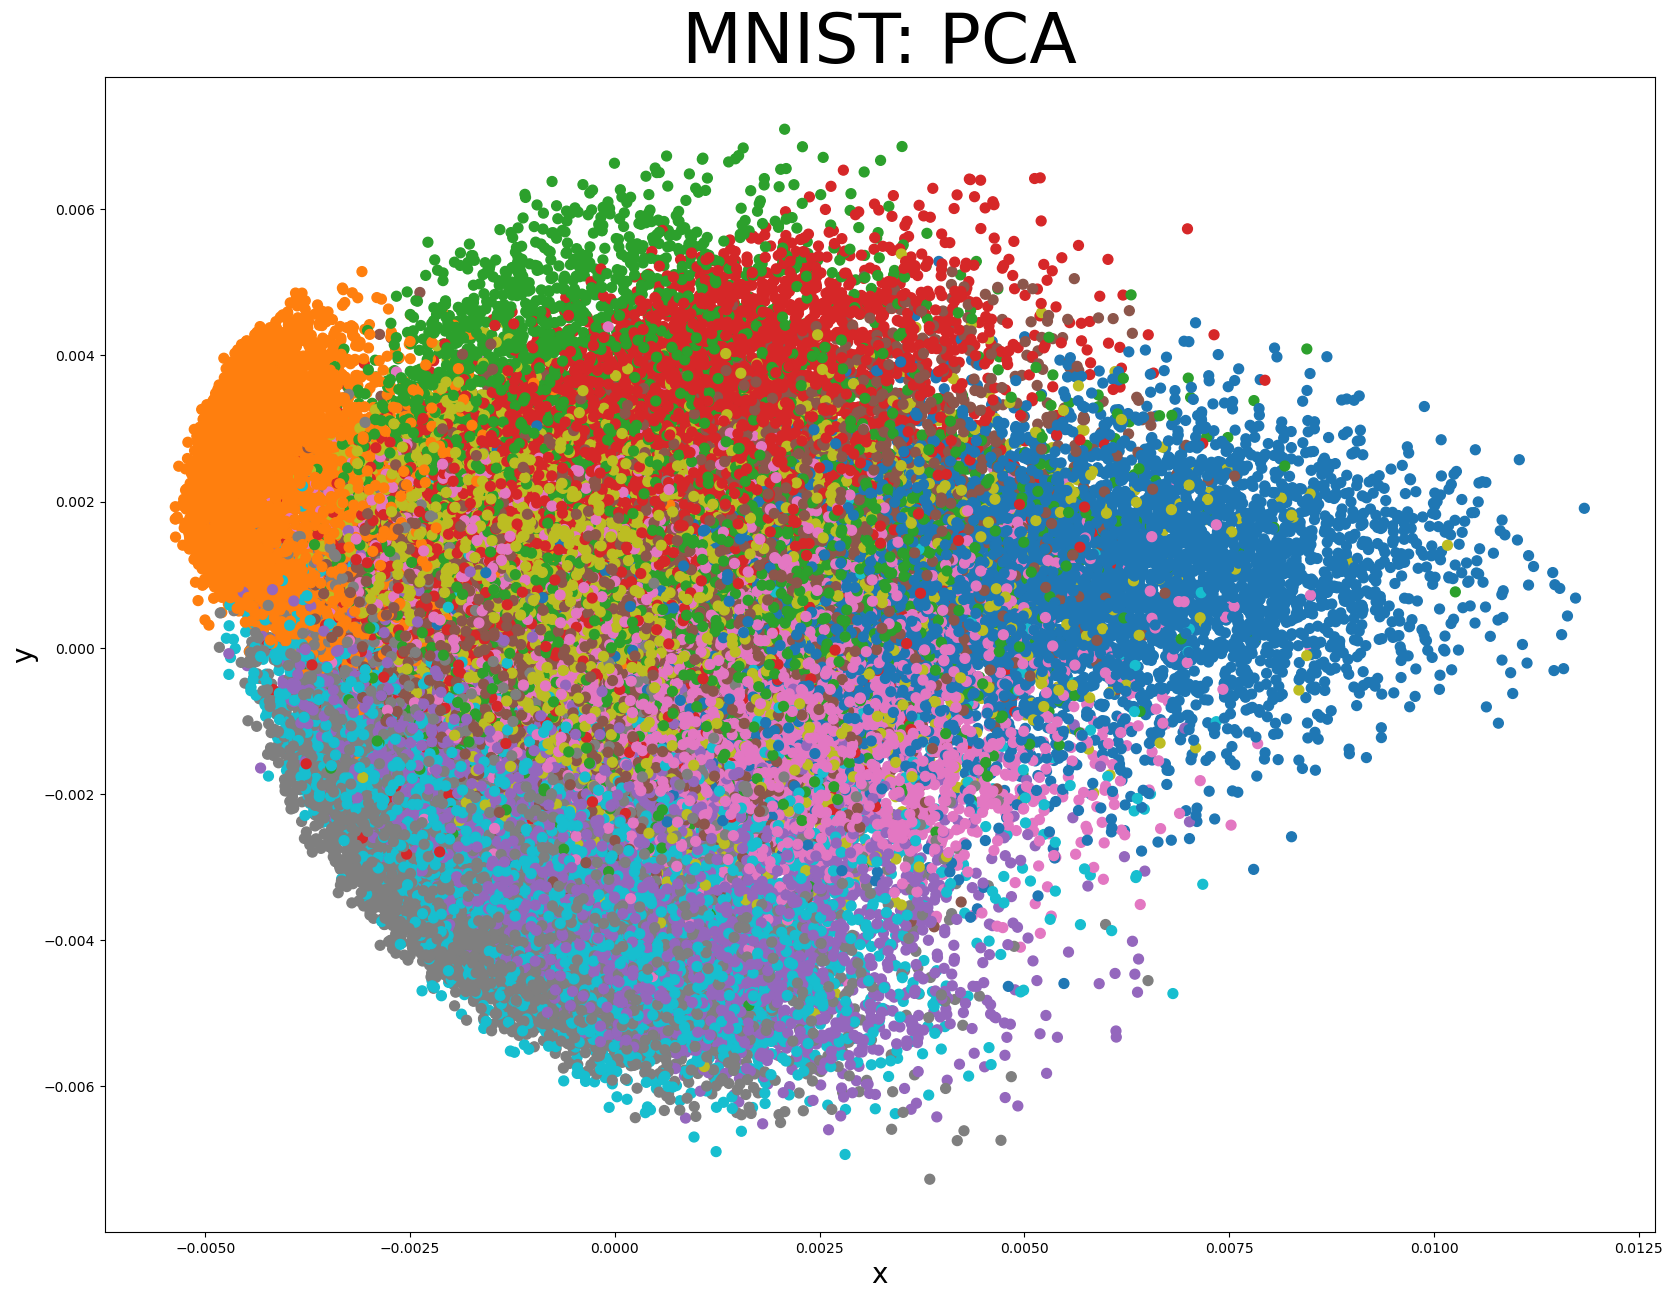

In [30]:
plt.figure(figsize=(20,15))

# for Kang
#colors = ['#1f77b4','#ff7f0e','#0d5e02','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#9ccf00','#07c1ef','#23199d','#099b95','#f6bf00'] # Kang
#mapped_colors = [colors[int(value-1)] for value in y_train]
#plt.scatter(y[:,0], y[:,1], s = 50, c=mapped_colors) # Kang

plt.scatter(y[:,0], y[:,1], s = 50, c=y_train, cmap='tab10')
# tSNE_PCA: \u03B1 = 0.75
plt.title("MNIST: PCA", fontsize = 50)
plt.xlabel("x", fontsize = 20); plt.ylabel("y", fontsize = 20)
plt.show()

### Save file ###

In [9]:
emb_path = path + 'embeddings/'

In [31]:
np.save(emb_path + 'MNIST_pca.npy', y)